# Import Packages

In [1]:
from urllib.request import urlretrieve
import rasterio
from os import listdir
import matplotlib.pyplot as plt
%matplotlib inline
from math import ceil
import numpy as np

# Essential Climate Variables and Climate Models

## All 54 variables
There are <a href="https://gcos.wmo.int/en/essential-climate-variables/table">54 essential climate variables</a>, divided in 3 categories:
- Atmosphere
- Land
- Ocean

<img src="https://nordicesmhub.github.io/climate-data-tutorial/fig/ECVs_GCOS.png" alt="alt_text" align="left"
	width="400" height="450" />

The WMO State of the Global Climate uses seven Climate Indicators to describe the changing climate:

<img src="https://ane4bf-datap1.s3.eu-west-1.amazonaws.com/wmod8_gcos/s3fs-public/2018-09/gci_1.png?l6C_ctykqckYTBoNoSCvf_uJdQaPoFtS" alt="alt_text" align="left"
	width="400" height="450" />

<a href="https://cds.climate.copernicus.eu/cdsapp#!/dataset/sis-ecv-cmip5-bias-corrected?tab=form">Copernicus Climate Data</a>

## Our variable subset (10 minutes step)

https://worldclim.org/data/worldclim21.html

- Minimum temperature (°C)
- Maximum temperature (°C)
- Average temperature (°C)
- Precipitation (mm)
- Solar radiation (kJ m-2 day-1)
- Wind speed (m s-1)
- Water vapor pressure (kPa)
- Bioclimatic variables
- Elevation

## Models
Global climate models (GCMs) for future 2021-2040, 10 minutes spatial resolution

https://worldclim.org/data/cmip6/cmip6_clim10m.html

<span style="color:green"><b>GCMs model names:</b></span>

ACCESS-CM2, ACCESS-ESM1-5, BCC-CSM2-MR, CanESM5, CanESM5-CanOE, CMCC-ESM2, CNRM-CM6-1, CNRM-CM6-1-HR, CNRM-ESM2-1, EC-Earth3-Veg, EC-Earth3-Veg-LR, FIO-ESM-2-0, GFDL-ESM4, GISS-E2-1-G, GISS-E2-1-H, HadGEM3-GC31-LL, INM-CM4-8, INM-CM5-0, IPSL-CM6A-LR, MIROC-ES2L, MIROC6, MPI-ESM1-2-HR, MPI-ESM1-2-LR, MRI-ESM2-0, UKESM1-0-LL 

<span style="color:green"><b>Shared socioeconomic pathways (SSPs):</b></span>
ssp126, ssp245, ssp370, ssp585

<p style="margin-bottom: 1em;"><span style="color:green"><b>The climate variables:</b></span>
tmin (tn) - monthly average minimum temperature (°C), tmax (tx) - monthly average maximum temperature (°C), prec (pr) - monthly total precipitation (mm), and bioc (bc) - <span style="color:green">bioclimatic variables</span> (the following 19 variables).</p>
    
BIO1 = Annual Mean Temperature

BIO2 = Mean Diurnal Range (Mean of monthly (max temp - min temp))

BIO3 = Isothermality (BIO2/BIO7) (×100)

BIO4 = Temperature Seasonality (standard deviation ×100)

BIO5 = Max Temperature of Warmest Month

BIO6 = Min Temperature of Coldest Month

BIO7 = Temperature Annual Range (BIO5-BIO6)

BIO8 = Mean Temperature of Wettest Quarter

BIO9 = Mean Temperature of Driest Quarter

BIO10 = Mean Temperature of Warmest Quarter

BIO11 = Mean Temperature of Coldest Quarter

BIO12 = Annual Precipitation

BIO13 = Precipitation of Wettest Month

BIO14 = Precipitation of Driest Month

BIO15 = Precipitation Seasonality (Coefficient of Variation)

BIO16 = Precipitation of Wettest Quarter

BIO17 = Precipitation of Driest Quarter

BIO18 = Precipitation of Warmest Quarter

BIO19 = Precipitation of Coldest Quarter

# Future Climate Data

## Load / download future climate data

In [2]:
# Define the file name and the url name to retrieve
url_base = "https://geodata.ucdavis.edu/cmip6/10m/"
gcm_model_name = "ACCESS-CM2"
ssp_model_name = "ssp126"
feature_names = ["tmin","tmax","prec","bioc"]
data_path = "../raw_data/wc2021-2040/"

In [ ]:
# Skip this if you have already downloaded the files
for feature_name in feature_names:
    file_name = 'wc2.1_10m_'+feature_name+'_'+gcm_model_name+'_'+ssp_model_name+'_2021-2040.tif'
    remote_url = url_base+gcm_model_name+'/'+ssp_model_name+'/'+file_name
    file_path = data_path+file_name
    # Download remote and save locally
    urlretrieve(remote_url, file_path)

## Display the future climate data

Docs

https://pypi.org/project/latlon-utils/

https://gis.stackexchange.com/questions/428728/get-lanlon-and-values-from-geotiff-using-python

In [3]:
# Load the data
data_list = [rasterio.open(data_path+file).read() for file in listdir(data_path)]
data_dict = dict(zip(listdir(data_path),data_list)) # if you need a dictionary
shape_list = [item.shape for item in data_list]
shape_list

[(19, 1080, 2160), (12, 1080, 2160), (12, 1080, 2160), (12, 1080, 2160)]

In [4]:
num_of_pics = sum([item[0] for item in shape_list])
num_of_pic_cols = 4
num_of_pic_rows = ceil(num_of_pics/num_of_pic_cols)


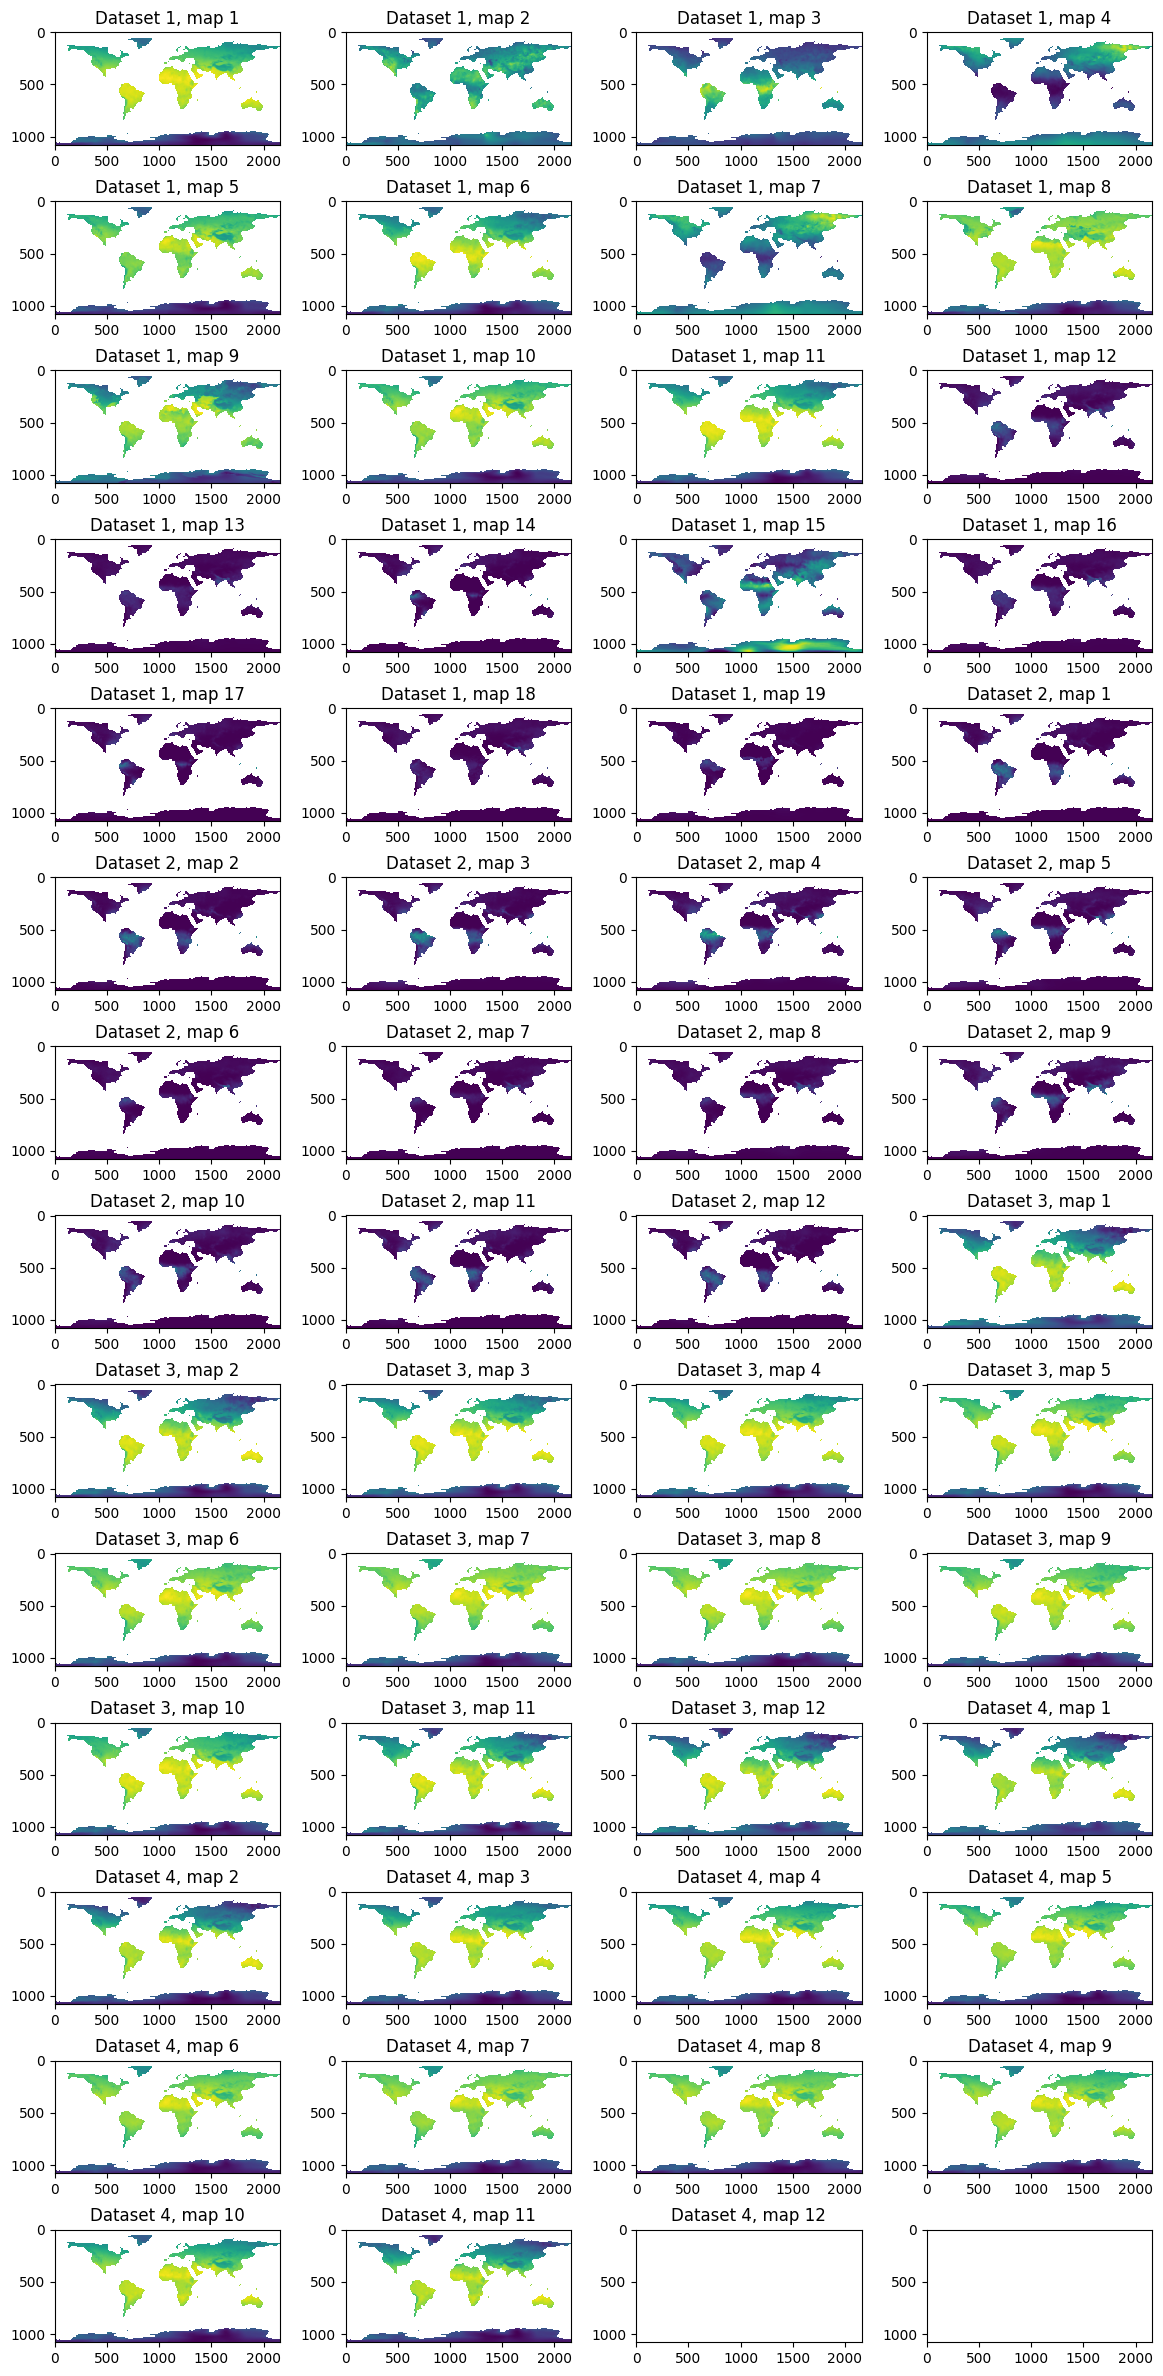

In [11]:
fig, axs = plt.subplots(num_of_pic_rows,num_of_pic_cols, facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = .5, wspace=.001)
fig.set_figheight(30)
fig.set_figwidth(15)
axs = axs.ravel()
map_no = 0

for file_id in range(len(data_list)):
    for inner_map_id in range(data_list[file_id].shape[0]):
                              axs[map_no].imshow(data_list[file_id][inner_map_id,:,:])
                              axs[map_no].set_title("Dataset "+str(file_id+1)+", map "+str(inner_map_id+1))
                              map_no = map_no+1
                    
if num_of_pics < num_of_pic_cols*num_of_pic_rows:
    dummy_img = data_list[file_id][inner_map_id,:,:]
    dummy_img[:,:]=np.nan
    for i in range(num_of_pic_cols*num_of_pic_rows-num_of_pics):
        axs[map_no].imshow(dummy_img)
        map_no = map_no+1
    

In [ ]:
# This shows that dataset 4, map 12 is obsolete
data_list[3][11]

In [ ]:
# !pip install latlon_utils rasterio xarray
# !conda install rasterio xarray
# from latlon_utils import get_climate

# # limit the number of columns printed by pandas
# import pandas; pandas.options.display.max_columns = 5
# get_climate(50, 10)